# Entrenar modelo removiendo vellos y con máscara

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import sys

# Importamos todas las librerias de utils
sys.path.append(os.path.realpath('../utils'))
from functions import *

In [2]:
%matplotlib inline
# sns.set(color_codes=True)
plt.style.use('default')

In [77]:
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle


(224, 224, 3)


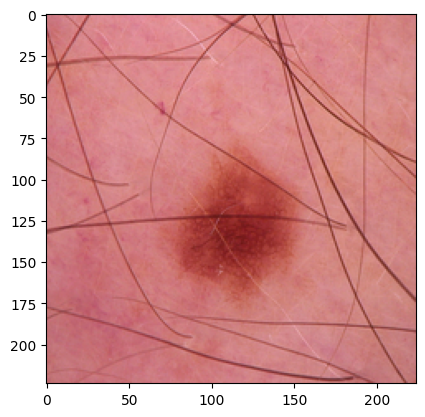

In [4]:
imageHair = cv2.imread('../data/raw/test/benign/18.jpg')

print(imageHair.shape)
plt.imshow(bgr2rgb(imageHair))
plt.show()

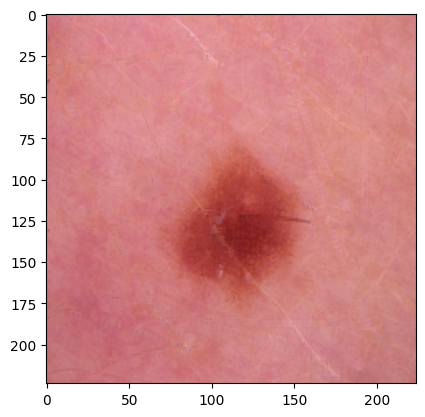

In [5]:
plt.imshow(bgr2rgb(eliminar_vello(imageHair)))
plt.show()

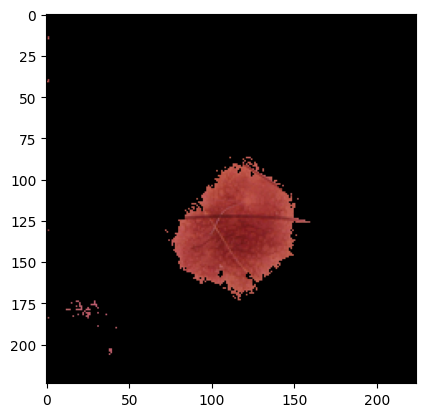

In [7]:
plt.imshow(bgr2rgb(mask_fondo(imageHair)))
plt.show()

In [6]:
prueba = eliminar_vello(imageHair)
print(prueba.shape)
prueba2 = cv2.resize(prueba,(224,224))
print(prueba2.shape)

(224, 224, 3)
(224, 224, 3)


In [8]:
malign_data = '../data/raw/train/malignant'
malign_data2 = '../data/raw/test/malignant'
benign_data = '../data/raw/train/benign'
benign_data2 = '../data/raw/test/benign'

df_test = pd.DataFrame() #Matriz de imágenes
df_train = pd.DataFrame() 
y_train_values = []  #Lista con los valores de target
y_test_values = [] 

count = 0

for img_name in os.listdir(malign_data):
    image = cv2.imread(malign_data+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1)  # (224*224, 1) = (50176, 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(1) # 1 = Maligno
    count += 1

for img_name in os.listdir(malign_data2):
    image = cv2.imread(malign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]),1) 
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(1) # 1 = Malign0
    count += 1

for img_name in os.listdir(benign_data):
    image = cv2.imread(benign_data+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_train[str(count)] = img_one_column_arr[:,0]
    y_train_values.append(0) # 0 = Benigno
    count += 1

for img_name in os.listdir(benign_data2):
    image = cv2.imread(benign_data2+"/"+img_name)
    img_gray = cv2.cvtColor(mask_fondo(image), cv2.COLOR_BGR2GRAY)
    img_one_column_arr = img_gray.reshape((image.shape[0]*image.shape[1]), 1)
    df_test[str(count)] = img_one_column_arr[:,0]
    y_test_values.append(0) # 0 = Benigno
    count += 1

C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
C:\Users\lucy9\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [9]:
df_train = df_train.T
df_test = df_test.T

In [10]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,141,138,135,135,134,134,135,136,138,142,...,0,0,0,0,0,0,0,0,0,0
1,33,38,43,48,55,61,68,74,81,86,...,67,61,56,51,45,41,35,31,27,22
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,160,159,0,0,0,0


In [11]:
a = df_test.max()
a.max()

223

In [12]:
# Normalizamos las tablas -> Dividimos cada valor por 255
df_test_Norm = df_test/255
df_train_Norm = df_train/255
df_test_Norm.head(3)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
1197,0.160784,0.180392,0.200000,0.223529,0.247059,0.266667,0.290196,0.321569,0.337255,0.34902,...,0.078431,0.058824,0.039216,0.023529,0.011765,0.003922,0.003922,0.003922,0.0,0.000000
1198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1199,0.592157,0.580392,0.596078,0.600000,0.607843,0.592157,0.549020,0.584314,0.000000,0.00000,...,0.243137,0.239216,0.235294,0.254902,0.266667,0.250980,0.231373,0.211765,0.2,0.196078


In [13]:
#Añadimos las traget a las tablas Normalizadas
df_train_Norm['target'] = y_train_values
df_test_Norm['target'] = y_test_values

In [14]:
#Tabla sin Normalizar
df_train['target'] = y_train_values
df_test['target'] = y_test_values

In [114]:
#Imagenes normalizadas
X = df_train_Norm.iloc[:,:-1]
y = df_train_Norm['target']

test = df_test_Norm.iloc[:,:-1]
y_true = df_test_Norm['target']

In [16]:
#Tabla sin Normalizar
# X = df_train.iloc[:,:-1]
# y = df_train['target']

# test = df_test.iloc[:,:-1]
# y_true = df_test['target']

MODELOS

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
import pickle

In [25]:
# sc=StandardScaler();
# X_train_s = sc.fit_transform(X)
# X_test_s = sc.fit_transform(test)

pca = PCA(n_components=70)
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.fit_transform(test)

* KNN

In [78]:
#Con PCA
X_train, X_test, y_train, y_test = train_test_split(X_train_pca,y,shuffle=True,test_size=0.2,random_state=42)

In [79]:
pipe1 = Pipeline(steps = [
                ('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=5))
])

In [80]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [81]:
predictions1 = pipe1.predict(X_test)
print('Accuracy test',pipe1.score(X_test,y_test))
print('Recall test',recall_score(y_test,predictions1))
print(confusion_matrix(y_test,predictions1))

Accuracy test 0.6231060606060606
Recall test 0.5263157894736842
[[209  91]
 [108 120]]


In [87]:
print(classification_report(y_test, predictions1, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       300
           1       0.57      0.53      0.55       228

    accuracy                           0.62       528
   macro avg       0.61      0.61      0.61       528
weighted avg       0.62      0.62      0.62       528



In [101]:
#Con PCA
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=42)

In [102]:
pipe1_pca = Pipeline(steps = [
                ('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=5))
])

In [104]:
pipe1_pca.fit(X_train,y_train) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [105]:
predictions1_pca = pipe1_pca.predict(X_test)
print('Accuracy test',pipe1_pca.score(X_test,y_test))
print('Recall test',recall_score(y_test,predictions1_pca))
print(confusion_matrix(y_test,predictions1_pca))

Accuracy test 0.6723484848484849
Recall test 0.4517543859649123
[[252  48]
 [125 103]]


In [106]:
print(classification_report(y_test, predictions1_pca, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74       300
           1       0.68      0.45      0.54       228

    accuracy                           0.67       528
   macro avg       0.68      0.65      0.64       528
weighted avg       0.67      0.67      0.66       528



* Random Forest

In [88]:
#Con PCA
X_train, X_test, y_train, y_test = train_test_split(X_train_pca,y,shuffle=True,test_size=0.2,random_state=42)

In [89]:
pipe2 = Pipeline(steps = [
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=100,random_state=42))
])

In [90]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [91]:
predictions2 = pipe2.predict(X_test)
print('Accuracy test',pipe2.score(X_test,y_test))
print('Recall test',recall_score(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

Accuracy test 0.6893939393939394
Recall test 0.5833333333333334
[[231  69]
 [ 95 133]]


In [93]:
print(classification_report(y_test, predictions2, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       300
           1       0.66      0.58      0.62       228

    accuracy                           0.69       528
   macro avg       0.68      0.68      0.68       528
weighted avg       0.69      0.69      0.69       528



In [94]:
#SIN PCA
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=42)

In [95]:
pipe3 = Pipeline(steps = [
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=100))
])

In [96]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [100]:
predictions3 = pipe3.predict(X_test)
print('Accuracy test',pipe3.score(X_test,y_test))
print('Recall test',recall_score(y_test,predictions3))
print(confusion_matrix(y_test,predictions3))

Accuracy test 0.7556818181818182
Recall test 0.6228070175438597
[[257  43]
 [ 86 142]]


In [99]:
print(classification_report(y_test, predictions3, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       300
           1       0.77      0.62      0.69       228

    accuracy                           0.76       528
   macro avg       0.76      0.74      0.74       528
weighted avg       0.76      0.76      0.75       528



In [67]:
#Con los datos del test
predictions3T = pipe3.predict(test)
print('Accuracy test',pipe3.score(test,y_true))
print('Recall test',recall_score(y_true,predictions3T))

Accuracy test 0.7363636363636363
Recall test 0.66


In [60]:
#Entrenar con todos los datos
pipe4 = Pipeline(steps = [
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=100))
])

In [61]:
pipe4.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [62]:
y_pred_4 = pipe4.predict(test)

print('Accuracy test',pipe4.score(test,y_true))
print('Recall test',recall_score(y_true,y_pred_4))

Accuracy test 0.7787878787878788
Recall test 0.7633333333333333


In [63]:
confusion_matrix(y_true,y_pred_4)

array([[285,  75],
       [ 71, 229]], dtype=int64)

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X_train_pca,y,test_size=0.2,random_state=42)

In [87]:
#Entrenar con todos los datos
pipe_pca = Pipeline(steps = [
                # ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=100))
])

In [88]:
pipe_pca.fit(X_train_pca,y)

Pipeline(steps=[('model', RandomForestClassifier())])

In [89]:
y_pred_pca = pipe_pca.predict(X_test_pca)

print('Accuracy test',pipe_pca.score(X_test_pca,y_true))
print('Recall test',recall_score(y_true,y_pred_pca))

Accuracy test 0.696969696969697
Recall test 0.6866666666666666


In [90]:
confusion_matrix(y_true,y_pred_pca)

array([[254, 106],
       [ 94, 206]], dtype=int64)

* SVM

In [115]:
'''SVM'''
svm = SVC(random_state=42)
svm.fit(X, y)

In [103]:
y_pred_svm = svm.predict(test)

print('Accuracy test',svm.score(test,y_true))
print('Recall test',recall_score(y_true,y_pred_svm))
confusion_matrix(y_true,y_pred_svm)

In [95]:
confusion_matrix(y_true,y_pred_svm)

array([[222, 138],
       [126, 174]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred_svm, target_names=['0','1']))

* Decision Tree Classifier

In [99]:
'''Decision Tree Classification'''
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X,y)

DecisionTreeClassifier()

In [101]:
y_pred_dt = dt.predict(test)

print('Accuracy test',dt.score(test,y_true))
print('Recall test',recall_score(y_true,y_pred_dt))

Accuracy test 0.6590909090909091
Recall test 0.59
